# Recurrence Neural Network: Different Architectures

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset:-imdb-review" data-toc-modified-id="Dataset:-imdb-review-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset: imdb review</a></span><ul class="toc-item"><li><span><a href="#Original-data-set-with-variable-input-length" data-toc-modified-id="Original-data-set-with-variable-input-length-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Original data set with variable input length</a></span></li><li><span><a href="#Fixing-the-input-length" data-toc-modified-id="Fixing-the-input-length-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fixing the input length</a></span></li></ul></li><li><span><a href="#Sequence-(fixed-length)-to-a-class-label" data-toc-modified-id="Sequence-(fixed-length)-to-a-class-label-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sequence (fixed length) to a class label</a></span></li><li><span><a href="#Sequence-(variable-length)-to-a-class-label" data-toc-modified-id="Sequence-(variable-length)-to-a-class-label-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sequence (variable length) to a class label</a></span><ul class="toc-item"><li><span><a href="#Generators---one-sample-at-a-time-(slow)" data-toc-modified-id="Generators---one-sample-at-a-time-(slow)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Generators - one sample at a time (slow)</a></span></li><li><span><a href="#Generators---one-batch-at-a-time--(faster)" data-toc-modified-id="Generators---one-batch-at-a-time--(faster)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Generators - one batch at a time  (faster)</a></span></li></ul></li><li><span><a href="#Sequence--to-sequence-(fixed-length-/-variable-length-)" data-toc-modified-id="Sequence--to-sequence-(fixed-length-/-variable-length-)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sequence  to sequence (fixed length / variable length )</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Regression</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
import keras
print(keras.__version__)
from keras.models import Sequential
from keras.utils import to_categorical
from keras import preprocessing
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, Dense, TimeDistributed,Input


from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

2.2.4


## Dataset: imdb review

### Original data set with variable input length

Loading data.....
# train sequences :  25000
# test sequences  :  25000
Class labels:  [0 1]


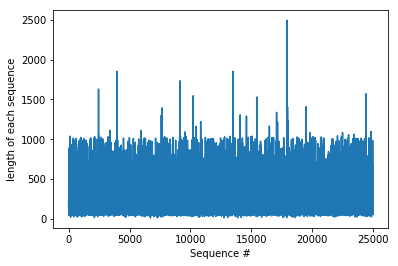

In [4]:
from keras.datasets import imdb

# number of words to consider as features to read from imdb database
nWordsfromData = 10000

print('Loading data.....')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=nWordsfromData)
print('# train sequences : ', len(X_train))
print('# test sequences  : ',len(X_test))
print('Class labels: ',np.unique(y_train))

plt.plot([len(X_train[i]) for i in range(len(X_train))])
plt.ylabel('length of each sequence')
plt.xlabel('Sequence #')
plt.show()

In [36]:
X_train = input_train
X_test = input_test

Xf_train = input_train_f
Xf_test = input_test_f

### Fixing the input length

In [37]:
# Top most commonly used words
nTopWords = 500  

print('')
print('Fixing length of each example to :',nTopWords)
print('Pad sequences (samples x time)')
Xf_train = sequence.pad_sequences(X_train, maxlen=nTopWords)
Xf_test = sequence.pad_sequences(X_test, maxlen=nTopWords)
print('New input_train shape:', Xf_train.shape)
print('New input_test shape:', Xf_test.shape)


Fixing length of each example to : 500
Pad sequences (samples x time)
New input_train shape: (25000, 500)
New input_test shape: (25000, 500)


## Sequence (fixed length) to a class label

Use LSTM, SimpleRNN, Embedding....

In [30]:
inputs = Input(shape=(nTopWords,),name='Input')
x = Embedding(nWordsfromData, 32,name='Embedding')(inputs)
x = LSTM(32,name='LSTM1')(x)
output = Dense(1, activation='sigmoid',name='output')(x)
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 500)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


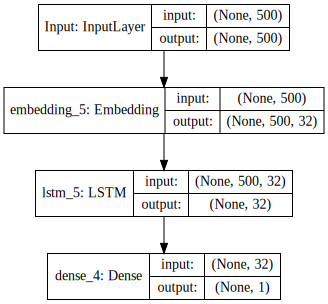

In [31]:
model.summary()
SVG(model_to_dot(model,show_shapes=True,show_layer_names=True).create(prog='dot', format='svg'))

In [32]:
history = model.fit(Xf_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 262s 13ms/step - loss: 0.5039 - acc: 0.7522 - val_loss: 0.3264 - val_acc: 0.8694
Epoch 2/10
20000/20000 [==============================] - 259s 13ms/step - loss: 0.2586 - acc: 0.9009 - val_loss: 0.2987 - val_acc: 0.8736
Epoch 3/10
20000/20000 [==============================] - 256s 13ms/step - loss: 0.1854 - acc: 0.9344 - val_loss: 0.3045 - val_acc: 0.8784
Epoch 4/10
20000/20000 [==============================] - 256s 13ms/step - loss: 0.1416 - acc: 0.9519 - val_loss: 0.3189 - val_acc: 0.8806
Epoch 5/10
20000/20000 [==============================] - 255s 13ms/step - loss: 0.1051 - acc: 0.9670 - val_loss: 0.3497 - val_acc: 0.8678
Epoch 6/10
20000/20000 [==============================] - 260s 13ms/step - loss: 0.1019 - acc: 0.9662 - val_loss: 0.3772 - val_acc: 0.8682
Epoch 7/10
20000/20000 [==============================] - 263s 13ms/step - loss: 0.0871 - acc: 0.9710 - val_loss: 0.4

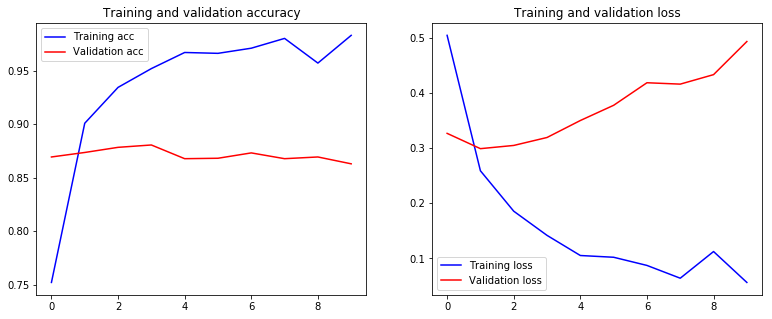

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(len(acc))

plt.figure(figsize=(13,5))
plt.subplot(121)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.legend()
plt.title('Training and validation accuracy')

plt.subplot(122)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
pr_tr = model.predict(Xf_train)
pr_ts = model.predict(Xf_test)

In [35]:
print('Training Accuracy : ',np.mean(y_train==1*(pr_tr>0.5)[:,0]))
print('Testing  Accuracy : ',np.mean(y_test==1*(pr_ts>0.5)[:,0]))

Training Accuracy :  0.96224
Testing  Accuracy :  0.85476


## Sequence (variable length) to a class label

**For using variable input length, firt we set input dimention of model to None and for training there are few ways:**

* Train a model on one sample at a time
* Create  batches of data with same size and train on each batch.  It is efficient If only the input length belongs to small set of values.

**For both of the above approaches, we will creat a generator, which draw one sample (one batch of same size) at a time from taining set.**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, None)              0         
_________________________________________________________________
Embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
LSTM1 (LSTM)                 (None, 32)                8320      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


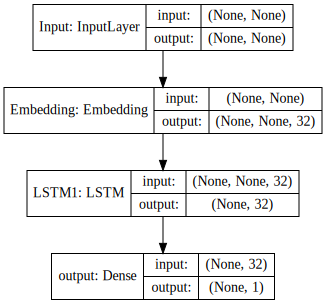

In [71]:
inputs = Input(shape=(None,),name='Input')
x = Embedding(nWordsfromData, 32,name='Embedding')(inputs)
x = LSTM(32,name='LSTM1')(x)
output = Dense(1, activation='sigmoid',name='output')(x)
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()
SVG(model_to_dot(model,show_shapes=True,show_layer_names=True).create(prog='dot', format='svg'))

### Generators - one sample at a time (slow)

In [72]:
idx=0
Idx = np.random.permutation(len(X_train))
def train_gen():
    global idx
    while True:
        xi_train = X_train[Idx[idx]]
        yi_train = y_train[Idx[idx]]
        idx=(idx+1)%len(Idx)
        yield np.array([xi_train]), np.array([[yi_train]])
        
        
idy=0
Idy = np.random.permutation(len(X_test))
def test_gen():
    global idy
    while True:
        xi_test = X_test[Idy[idy]]
        yi_test = y_test[Idy[idy]]
        idy=(idy+1)%len(Idy)
        yield np.array([xi_test]), np.array([[yi_test]])

In [73]:
model.fit_generator(train_gen(),steps_per_epoch=len(X_train),epochs=10, verbose=1,
                    validation_data=test_gen(),validation_steps=len(X_test))

Epoch 1/10
25000/25000 [==============================] - 11370s 455ms/step - loss: 0.4396 - acc: 0.7989 - val_loss: 0.3368 - val_acc: 0.8611
Epoch 2/10
25000/25000 [==============================] - 5680s 227ms/step - loss: 0.2710 - acc: 0.8919 - val_loss: 0.2976 - val_acc: 0.8811
Epoch 3/10
25000/25000 [==============================] - 2520s 101ms/step - loss: 0.1901 - acc: 0.9296 - val_loss: 0.3011 - val_acc: 0.8833
Epoch 4/10
25000/25000 [==============================] - 2525s 101ms/step - loss: 0.1333 - acc: 0.9536 - val_loss: 0.3055 - val_acc: 0.8866
Epoch 5/10
25000/25000 [==============================] - 2529s 101ms/step - loss: 0.0904 - acc: 0.9705 - val_loss: 0.3769 - val_acc: 0.8820
Epoch 6/10
25000/25000 [==============================] - 2534s 101ms/step - loss: 0.0636 - acc: 0.9804 - val_loss: 0.4637 - val_acc: 0.8777
Epoch 7/10
25000/25000 [==============================] - 2538s 102ms/step - loss: 0.0446 - acc: 0.9861 - val_loss: 0.4901 - val_acc: 0.8721
Epoch 8/10
2

In [129]:
pr_tr = np.array([model.predict(np.array([X_train[i]])) for i in range(len(X_train))])
pr_ts = np.array([model.predict(np.array([X_test[i]]))  for i in range(len(X_test))])

In [139]:
print('Training Accuracy : ',np.mean(y_train==1*(pr_tr[:,0,0]>0.5)))
print('Testing  Accuracy : ',np.mean(y_test==1*(pr_ts[:,0,0]>0.5)))

Training Accuracy :  0.81824
Testing  Accuracy :  0.75152


In [ ]:
pr_tr = model.predict(input_train)
pr_ts = model.predict(input_test)
print('Training Accuracy : ',np.mean(y_train==1*(pr_tr>0.5)[:,0]))
print('Testing  Accuracy : ',np.mean(y_test==1*(pr_ts>0.5)[:,0]))

### Generators - one batch at a time  (faster)

In [55]:
ln  = [len(X_train[i]) for i in range(len(X_train))]
uln,frq = np.unique(ln,return_counts=True)

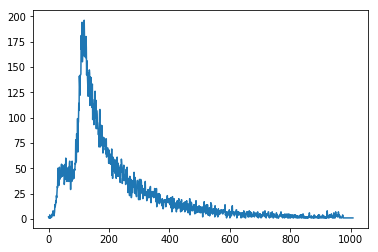

In [56]:
plt.plot(frq)

In [57]:
ln  = [len(X_train[i]) for i in range(len(X_train))]
uln = np.unique(ln)
LX  = [np.where(ln==u)[0] for u in uln]
XT  = [np.array([X_train[i] for i in lx]) for lx in LX]
YT  = [np.array([y_train[i] for i in lx]) for lx in LX]

ln  = np.array([len(X_test[i])  for i in range(len(X_test))])
uln = np.unique(ln)
LX  = [np.where(ln==u)[0] for u in uln]
XV  = [np.array([X_test[i] for i in lx]) for lx in LX]
YV  = [np.array([y_test[i] for i in lx]) for lx in LX]

idxb=0
Idxb = np.random.permutation(len(XT))
def train_gen_batch():
    global idxb
    while True:
        xi_train = XT[Idxb[idxb]]
        yi_train = YT[Idxb[idxb]]
        idxb=(idxb+1)%len(Idxb)
        yield xi_train, yi_train
        
        
idyb=0
Idyb = np.random.permutation(len(XV))
def test_gen_batch():
    global idyb
    while True:
        xi_test = XV[Idyb[idyb]]
        yi_test = YV[Idyb[idyb]]
        idyb=(idyb+1)%len(Idyb)
        yield xi_test, yi_test

In [62]:
inputs = Input(shape=(None,),name='Input')
x = Embedding(nWordsfromData, 32,name='Embedding')(inputs)
x = LSTM(32,name='LSTM1')(x)
output = Dense(1, activation='sigmoid',name='output')(x)
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, None)              0         
_________________________________________________________________
Embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
LSTM1 (LSTM)                 (None, 32)                8320      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


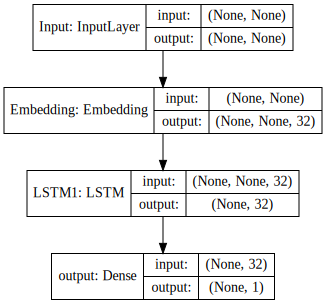

In [70]:
model.summary()
SVG(model_to_dot(model,show_shapes=True,show_layer_names=True).create(prog='dot', format='svg'))

In [63]:
history = model.fit_generator(train_gen_batch(),steps_per_epoch=3*len(XT),epochs=10, verbose=1,
                    validation_data=test_gen_batch(),validation_steps=3*len(XV))

Epoch 1/10
3024/3024 [==============================] - 730s 241ms/step - loss: 0.4288 - acc: 0.8008 - val_loss: 0.5290 - val_acc: 0.8006
Epoch 2/10
3024/3024 [==============================] - 807s 267ms/step - loss: 0.2394 - acc: 0.9062 - val_loss: 0.4557 - val_acc: 0.8185
Epoch 3/10
3024/3024 [==============================] - 804s 266ms/step - loss: 0.1286 - acc: 0.9576 - val_loss: 0.5419 - val_acc: 0.8188
Epoch 4/10
3024/3024 [==============================] - 785s 259ms/step - loss: 0.0973 - acc: 0.9677 - val_loss: 0.5414 - val_acc: 0.8434
Epoch 5/10
3024/3024 [==============================] - 721s 239ms/step - loss: 0.0708 - acc: 0.9804 - val_loss: 0.5744 - val_acc: 0.8481
Epoch 6/10
3024/3024 [==============================] - 725s 240ms/step - loss: 0.0725 - acc: 0.9770 - val_loss: 0.5899 - val_acc: 0.8414
Epoch 7/10
3024/3024 [==============================] - 721s 239ms/step - loss: 0.0550 - acc: 0.9826 - val_loss: 0.6528 - val_acc: 0.8462
Epoch 8/10
3024/3024 [============

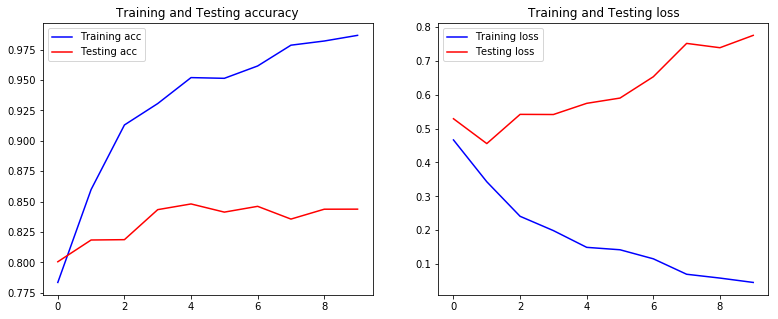

In [69]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(len(acc))

plt.figure(figsize=(13,5))
plt.subplot(121)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Testing acc')
plt.legend()
plt.title('Training and Testing accuracy')

plt.subplot(122)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Testing loss')
plt.title('Training and Testing loss')
plt.legend()

plt.show()

In [66]:
pr_tr = np.array([model.predict(np.array([X_train[i]])) for i in range(len(X_train))])
pr_ts = np.array([model.predict(np.array([X_test[i]]))  for i in range(len(X_test))])
print('Training Accuracy : ',np.mean(y_train==1*(pr_tr[:,0,0]>0.5)))
print('Testing  Accuracy : ',np.mean(y_test==1*(pr_ts[:,0,0]>0.5)))

Training Accuracy :  0.99424
Testing  Accuracy :  0.84384


## Sequence  to sequence (fixed length / variable length )

In [ ]:
inputs = Input(shape=(None,),name='Input')
x = Embedding(nWordsfromData, 32,name='Embedding')(inputs)
x = LSTM(32,name='LSTM1')(x)
output = TimeDistributed(Dense(1,activation='sigmoid'))(x)
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
inputs = Input(shape=(500,),name='Input')
x = Embedding(nWordsfromData, 32,name='Embedding')(inputs)
x = LSTM(32,name='LSTM1')(x)
output = TimeDistributed(Dense(1,activation='sigmoid'))(x)
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

## Regression

For regression everything else is similar except the model

In [ ]:
inputs = Input(shape=(None,),name='Input')
x = Embedding(nWordsfromData, 32,name='Embedding')(inputs)
x = LSTM(32,name='LSTM1')(x)
output = Dense(1, activation='linear',name='output')(x)
model = Model(inputs=inputs, outputs=output)
model.compile(loss='mse',optimizer='adam')